In [1]:
from data_plot import *
from NLP_data_read import *

In [2]:

lines = read_time_machine()
print(f'# text lines: {len(lines)}')
print(lines[0])
print(lines[10])

# text lines: 3558
the project gutenberg ebook of the time machine
title the time machine


In [3]:

        
tokens=tokenize(lines)
for i in range(11):
    print(tokens[i])

['the', 'project', 'gutenberg', 'ebook', 'of', 'the', 'time', 'machine']
[]
['this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'united', 'states', 'and']
['most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions']
['whatsoever', 'you', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 're', 'use', 'it', 'under', 'the', 'terms']
['of', 'the', 'project', 'gutenberg', 'license', 'included', 'with', 'this', 'ebook', 'or', 'online']
['at', 'www', 'gutenberg', 'org', 'if', 'you', 'are', 'not', 'located', 'in', 'the', 'united', 'states']
['you', 'will', 'have', 'to', 'check', 'the', 'laws', 'of', 'the', 'country', 'where', 'you', 'are', 'located']
['before', 'using', 'this', 'ebook']
[]
['title', 'the', 'time', 'machine']


In [4]:
[token for line in tokens for token in line]

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'the',
 'time',
 'machine',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'in',
 'the',
 'united',
 'states',
 'and',
 'most',
 'other',
 'parts',
 'of',
 'the',
 'world',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 'you',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'or',
 're',
 'use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'project',
 'gutenberg',
 'license',
 'included',
 'with',
 'this',
 'ebook',
 'or',
 'online',
 'at',
 'www',
 'gutenberg',
 'org',
 'if',
 'you',
 'are',
 'not',
 'located',
 'in',
 'the',
 'united',
 'states',
 'you',
 'will',
 'have',
 'to',
 'check',
 'the',
 'laws',
 'of',
 'the',
 'country',
 'where',
 'you',
 'are',
 'located',
 'before',
 'using',
 'this',
 'ebook',
 'title',
 'the',
 'time',
 'machine',
 'author',
 'h',
 'g',
 'wells',
 'release',
 'date',
 'october',
 'ebook',
 'most',
 'recently',
 'upd

In [5]:
vocab = Vocab(tokens)
print(list(vocab.token_to_idx.items())[:10])

[('<unk>', 0), ('the', 1), ('and', 2), ('of', 3), ('i', 4), ('a', 5), ('to', 6), ('in', 7), ('was', 8), ('that', 9)]


In [6]:
for i in [0, 10]:
    print('text:', tokens[i])
    print('index:', vocab[tokens[i]])

text: ['the', 'project', 'gutenberg', 'ebook', 'of', 'the', 'time', 'machine']
index: [1, 53, 44, 313, 3, 1, 19, 46]
text: ['title', 'the', 'time', 'machine']
index: [2441, 1, 19, 46]


In [7]:
corpus = [token for line in tokens for token in line]
vocab = Vocab(corpus)
vocab.token_freqs[:10]

[('the', 2477),
 ('and', 1311),
 ('of', 1285),
 ('i', 1268),
 ('a', 877),
 ('to', 766),
 ('in', 605),
 ('was', 554),
 ('that', 458),
 ('it', 452)]

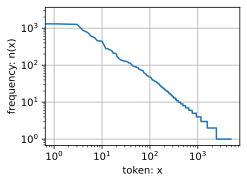

In [8]:
freqs = [freq for token, freq in vocab.token_freqs]
plot(freqs, xlabel='token: x', ylabel='frequency: n(x)',
         xscale='log', yscale='log')

In [9]:
bigram_tokens = [pair for pair in zip(corpus[:-1], corpus[1:])]
bigram_vocab = Vocab(bigram_tokens)
bigram_vocab.token_freqs[:10]

[(('of', 'the'), 344),
 (('in', 'the'), 192),
 (('i', 'had'), 130),
 (('and', 'the'), 112),
 (('i', 'was'), 112),
 (('the', 'time'), 110),
 (('to', 'the'), 101),
 (('it', 'was'), 99),
 (('project', 'gutenberg'), 88),
 (('as', 'i'), 78)]

In [10]:
trigram_tokens = [triple for triple in zip(
    corpus[:-2], corpus[1:-1], corpus[2:])]
trigram_vocab = Vocab(trigram_tokens)
trigram_vocab.token_freqs[:10]

[(('the', 'time', 'traveller'), 63),
 (('the', 'time', 'machine'), 34),
 (('the', 'project', 'gutenberg'), 33),
 (('the', 'medical', 'man'), 24),
 (('project', 'gutenberg', 'electronic'), 18),
 (('it', 'seemed', 'to'), 16),
 (('it', 'was', 'a'), 15),
 (('here', 'and', 'there'), 15),
 (('the', 'united', 'states'), 14),
 (('seemed', 'to', 'me'), 14)]

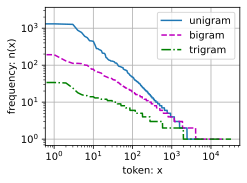

In [11]:
bigram_freqs = [freq for token, freq in bigram_vocab.token_freqs]
trigram_freqs = [freq for token, freq in trigram_vocab.token_freqs]
plot([freqs, bigram_freqs, trigram_freqs], xlabel='token: x',
         ylabel='frequency: n(x)', xscale='log', yscale='log',
         legend=['unigram', 'bigram', 'trigram'])

In [12]:
my_seq = list(range(35))
for X, Y in seq_data_iter_random(my_seq, batch_size=2, num_steps=5):
    print('X: ', X, '\nY:', Y)

X:  tensor([[ 2,  3,  4,  5,  6],
        [17, 18, 19, 20, 21]]) 
Y: tensor([[ 3,  4,  5,  6,  7],
        [18, 19, 20, 21, 22]])
X:  tensor([[12, 13, 14, 15, 16],
        [22, 23, 24, 25, 26]]) 
Y: tensor([[13, 14, 15, 16, 17],
        [23, 24, 25, 26, 27]])
X:  tensor([[27, 28, 29, 30, 31],
        [ 7,  8,  9, 10, 11]]) 
Y: tensor([[28, 29, 30, 31, 32],
        [ 8,  9, 10, 11, 12]])
